In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
raw_data = pd.read_csv('C:\\Users\\HP\\Desktop\\DATA SCIENCE\\HousePricePredictionData.csv')
raw_data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
raw_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2915,2919.000000,2919,2919,2919.000000,2919.000000,2919.000000,2918,2918.000000,2918.000000,1460.000000
unique,NaN,NaN,5,NaN,5,5,NaN,NaN,NaN,15,NaN,NaN,NaN
top,NaN,NaN,RL,NaN,Inside,1Fam,NaN,NaN,NaN,VinylSd,NaN,NaN,NaN
freq,NaN,NaN,2265,NaN,2133,2425,NaN,NaN,NaN,1025,NaN,NaN,NaN
mean,1459.000000,57.137718,NaN,10168.114080,NaN,NaN,5.564577,1971.312778,1984.264474,NaN,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,NaN,7886.996359,NaN,NaN,1.113131,30.291442,20.894344,NaN,169.205611,440.766258,79442.502883
min,0.000000,20.000000,NaN,1300.000000,NaN,NaN,1.000000,1872.000000,1950.000000,NaN,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,NaN,7478.000000,NaN,NaN,5.000000,1953.500000,1965.000000,NaN,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,NaN,9453.000000,NaN,NaN,5.000000,1973.000000,1993.000000,NaN,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,NaN,11570.000000,NaN,NaN,6.000000,2001.000000,2004.000000,NaN,0.000000,1302.000000,214000.000000


In [4]:
raw_data.isnull()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,False,False,False,False,False,False,True
2915,False,False,False,False,False,False,False,False,False,False,False,False,True
2916,False,False,False,False,False,False,False,False,False,False,False,False,True
2917,False,False,False,False,False,False,False,False,False,False,False,False,True


In [5]:
raw_data.isnull().sum

<bound method DataFrame.sum of          Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0     False       False     False    False      False     False        False   
1     False       False     False    False      False     False        False   
2     False       False     False    False      False     False        False   
3     False       False     False    False      False     False        False   
4     False       False     False    False      False     False        False   
...     ...         ...       ...      ...        ...       ...          ...   
2914  False       False     False    False      False     False        False   
2915  False       False     False    False      False     False        False   
2916  False       False     False    False      False     False        False   
2917  False       False     False    False      False     False        False   
2918  False       False     False    False      False     False        False   

      Ye

In [6]:
# I dropped the column ID AS THIS does nothing to our prediction
data = raw_data.drop(['Id'], axis=1)
data.describe(include = 'all')

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2915,2919.000000,2919,2919,2919.000000,2919.000000,2919.000000,2918,2918.000000,2918.000000,1460.000000
unique,NaN,5,NaN,5,5,NaN,NaN,NaN,15,NaN,NaN,NaN
top,NaN,RL,NaN,Inside,1Fam,NaN,NaN,NaN,VinylSd,NaN,NaN,NaN
freq,NaN,2265,NaN,2133,2425,NaN,NaN,NaN,1025,NaN,NaN,NaN
mean,57.137718,NaN,10168.114080,NaN,NaN,5.564577,1971.312778,1984.264474,NaN,49.582248,1051.777587,180921.195890
std,42.517628,NaN,7886.996359,NaN,NaN,1.113131,30.291442,20.894344,NaN,169.205611,440.766258,79442.502883
min,20.000000,NaN,1300.000000,NaN,NaN,1.000000,1872.000000,1950.000000,NaN,0.000000,0.000000,34900.000000
25%,20.000000,NaN,7478.000000,NaN,NaN,5.000000,1953.500000,1965.000000,NaN,0.000000,793.000000,129975.000000
50%,50.000000,NaN,9453.000000,NaN,NaN,5.000000,1973.000000,1993.000000,NaN,0.000000,989.500000,163000.000000
75%,70.000000,NaN,11570.000000,NaN,NaN,6.000000,2001.000000,2004.000000,NaN,0.000000,1302.000000,214000.000000


In [7]:
# I drop all mssing values from the datasns.displot(data_no_mv['Price'])
data.shape

(2919, 12)

In [8]:
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [9]:
# dropped all null values in the column, it wasn't a good idea to replace it 
# with the mean values of the column as this could cause our data to be false
data = data.dropna(subset=['SalePrice'])

In [10]:
# dropped the values in the columns that are missing
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

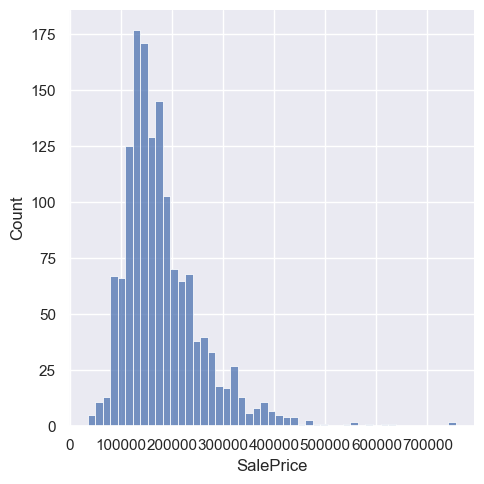

In [11]:
# I can see from here that my data is looking skewed so I perfrom a log transformation to remove outliers
sns.displot(data['SalePrice'])

In [12]:
# so to deal with outliers I can remove the top 1%
q = data['SalePrice'].quantile(0.99)
# then this removes 1 percentile and leaves the 99 percentile
data_1 = data[data['SalePrice']<q].copy()
data_1.describe(include='all')

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1445.000000,1445,1445.000000,1445,1445,1445.000000,1445.000000,1445.000000,1445,1445.000000,1445.00000,1445.000000
unique,NaN,5,NaN,5,5,NaN,NaN,NaN,15,NaN,NaN,NaN
top,NaN,RL,NaN,Inside,1Fam,NaN,NaN,NaN,VinylSd,NaN,NaN,NaN
freq,NaN,1137,NaN,1043,1205,NaN,NaN,NaN,507,NaN,NaN,NaN
mean,56.993080,NaN,10423.696886,NaN,NaN,5.577855,1971.004844,1984.668512,NaN,46.659516,1047.15917,177082.510035
std,42.460752,NaN,9929.978538,NaN,NaN,1.113532,30.109369,20.652450,NaN,161.571276,426.37156,69614.603756
min,20.000000,NaN,1300.000000,NaN,NaN,1.000000,1872.000000,1950.000000,NaN,0.000000,0.00000,34900.000000
25%,20.000000,NaN,7500.000000,NaN,NaN,5.000000,1954.000000,1966.000000,NaN,0.000000,794.00000,129900.000000
50%,50.000000,NaN,9430.000000,NaN,NaN,5.000000,1972.000000,1993.000000,NaN,0.000000,988.00000,162000.000000
75%,70.000000,NaN,11478.000000,NaN,NaN,6.000000,2000.000000,2004.000000,NaN,0.000000,1278.00000,212000.000000


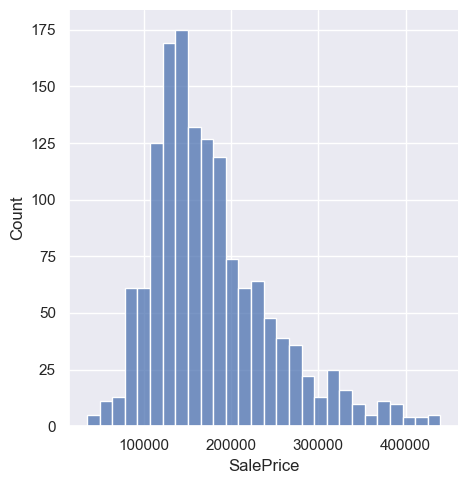

In [13]:
# these has handled the outliers in our data
sns.displot(data_1['SalePrice'])

# check for OLS Assumptions

In [14]:
log_price = np.log(data_1['SalePrice'])
# and we add it to our data_cleaned table
data_1['SalePrice_log'] = log_price
data_1

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,SalePrice_log
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0,12.247694
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0,12.109011
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0,12.317167
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0,11.849398
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0,12.072541
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0,12.254863
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0,12.493130
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0,11.864462


In [15]:
# See how each correlates with SalePrice
data_1[[ 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']].corr()
#so I saw that the BsmFinSF2 and Saleprice do not really have a correlation so I dropped

,BsmtFinSF2,TotalBsmtSF,SalePrice
BsmtFinSF2,1.000000,0.104718,-0.009578
TotalBsmtSF,0.104718,1.000000,0.592274
SalePrice,-0.009578,0.592274,1.000000


# so I saw that the BsmFinSF2 and Saleprice do not really have a correlation so I dropped 
# the BsmtFinSF2 column

In [16]:
data_1[['MSSubClass', 'SalePrice_log']].corr()

,MSSubClass,SalePrice_log
MSSubClass,1.000000,-0.071034
SalePrice_log,-0.071034,1.000000


<Axes: >

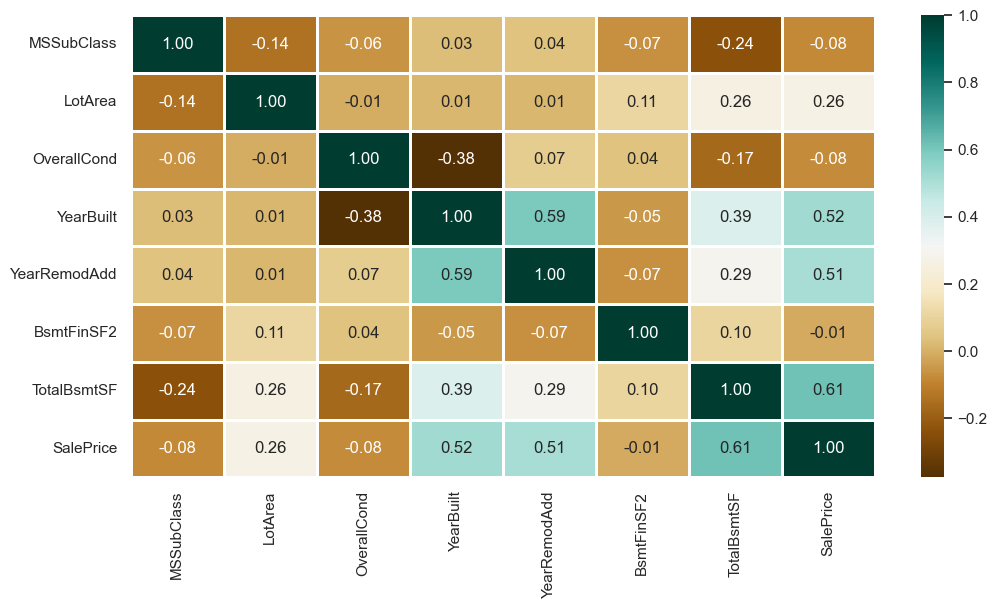

In [17]:
# I used this to see the different corelation btw the inputs and saleprice
data_2 = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(data_2.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [18]:
print(data_1.columns.tolist())

['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'SalePrice_log']


In [19]:
data_1['SalePrice_log'] = np.log1p(data_1['SalePrice'])
data_1['LotArea_log'] = np.log1p(data_1['LotArea'])
data_1['TotalBsmtSF_log'] = np.log1p(data_1['TotalBsmtSF'])

data_1
# before doing a log trans on any column check if it is skewed in anyway

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,SalePrice_log,LotArea_log,TotalBsmtSF_log
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0,12.247699,9.042040,6.753438
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0,12.109016,9.169623,7.141245
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0,12.317171,9.328212,6.825460
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0,11.849405,9.164401,6.629363
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0,12.429220,9.565284,7.044033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0,12.072547,8.976894,6.860664
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0,12.254868,9.486152,7.341484
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0,12.493133,9.109746,7.050123
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0,11.864469,9.181735,6.983790


# do the log graph of all these columns in the cell below

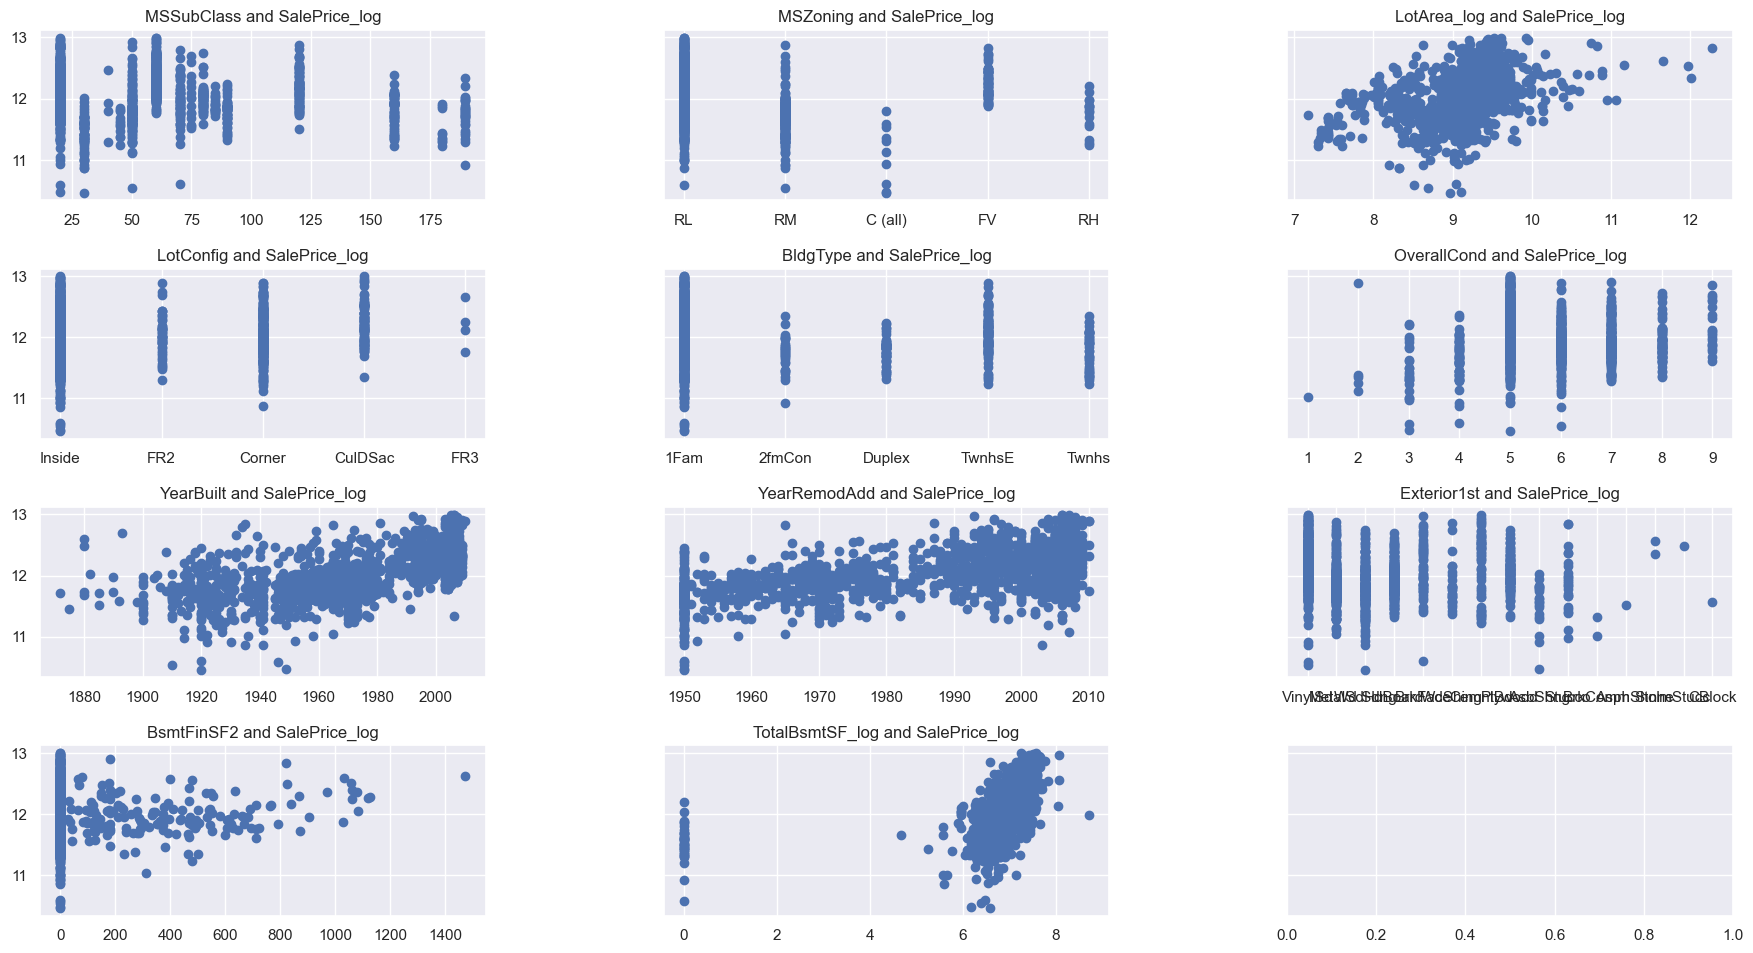

In [20]:
fig, axes = plt.subplots(4, 3, figsize=(18, 10), sharey=True)  # 2 rows, 4 columns

axes = axes.flatten()  # flatten 2D axes array into 1D for easy indexing

# Now plot each feature
axes[0].scatter(data_1['MSSubClass'], data_1['SalePrice_log'])
axes[0].set_title('MSSubClass and SalePrice_log')

axes[1].scatter(data_1['MSZoning'], data_1['SalePrice_log'])
axes[1].set_title('MSZoning and SalePrice_log')

axes[2].scatter(data_1['LotArea_log'], data_1['SalePrice_log'])
axes[2].set_title('LotArea_log and SalePrice_log')

axes[3].scatter(data_1['LotConfig'], data_1['SalePrice_log'])  # FIX: LotConfig instead of LotArea
axes[3].set_title('LotConfig and SalePrice_log')

axes[4].scatter(data_1['BldgType'], data_1['SalePrice_log'])
axes[4].set_title('BldgType and SalePrice_log')

axes[5].scatter(data_1['OverallCond'], data_1['SalePrice_log'])
axes[5].set_title('OverallCond and SalePrice_log')

axes[6].scatter(data_1['YearBuilt'], data_1['SalePrice_log'])
axes[6].set_title('YearBuilt and SalePrice_log')

axes[7].scatter(data_1['YearRemodAdd'], data_1['SalePrice_log'])
axes[7].set_title('YearRemodAdd and SalePrice_log')

axes[8].scatter(data_1['Exterior1st'], data_1['SalePrice_log'])
axes[8].set_title('Exterior1st and SalePrice_log')

axes[9].scatter(data_1['BsmtFinSF2'], data_1['SalePrice_log'])
axes[9].set_title('BsmtFinSF2 and SalePrice_log')

axes[10].scatter(data_1['TotalBsmtSF_log'], data_1['SalePrice_log'])
axes[10].set_title('TotalBsmtSF_log and SalePrice_log')

plt.tight_layout(pad=2.0)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric features
features = ['LotArea','OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']
variables = data_1[features].copy()

# Drop missing values
variables = variables.dropna()

# Add intercept term, this stabilizes the VIF so I do not have what I'm having up 
variables = add_constant(variables)

# Calculate VIF
vif = pd.DataFrame()
vif["features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif

# So I can see from the above graph for each of the input features that none of them
# really causes a form of multicollinearity so I won't drop any column

,features,VIF
0,const,10317.380737
1,LotArea,1.080536
2,OverallCond,1.380366
3,YearBuilt,2.204277
4,YearRemodAdd,1.838222
5,TotalBsmtSF,1.277394


In [22]:
# so next I drop the other columns that I now have their logs
data_2 = data_1.drop(['SalePrice', 'LotArea','TotalBsmtSF'], axis=1)
data_2


,MSSubClass,MSZoning,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,SalePrice_log,LotArea_log,TotalBsmtSF_log
0,60,RL,Inside,1Fam,5,2003,2003,VinylSd,0.0,12.247699,9.042040,6.753438
1,20,RL,FR2,1Fam,8,1976,1976,MetalSd,0.0,12.109016,9.169623,7.141245
2,60,RL,Inside,1Fam,5,2001,2002,VinylSd,0.0,12.317171,9.328212,6.825460
3,70,RL,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,11.849405,9.164401,6.629363
4,60,RL,FR2,1Fam,5,2000,2000,VinylSd,0.0,12.429220,9.565284,7.044033
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Inside,1Fam,5,1999,2000,VinylSd,0.0,12.072547,8.976894,6.860664
1456,20,RL,Inside,1Fam,6,1978,1988,Plywood,163.0,12.254868,9.486152,7.341484
1457,70,RL,Inside,1Fam,9,1941,2006,CemntBd,0.0,12.493133,9.109746,7.050123
1458,20,RL,Inside,1Fam,6,1950,1996,MetalSd,1029.0,11.864469,9.181735,6.983790


In [23]:
data_2 = data_2.drop(['BsmtFinSF2'], axis=1)
data_2

,MSSubClass,MSZoning,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,SalePrice_log,LotArea_log,TotalBsmtSF_log
0,60,RL,Inside,1Fam,5,2003,2003,VinylSd,12.247699,9.042040,6.753438
1,20,RL,FR2,1Fam,8,1976,1976,MetalSd,12.109016,9.169623,7.141245
2,60,RL,Inside,1Fam,5,2001,2002,VinylSd,12.317171,9.328212,6.825460
3,70,RL,Corner,1Fam,5,1915,1970,Wd Sdng,11.849405,9.164401,6.629363
4,60,RL,FR2,1Fam,5,2000,2000,VinylSd,12.429220,9.565284,7.044033
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Inside,1Fam,5,1999,2000,VinylSd,12.072547,8.976894,6.860664
1456,20,RL,Inside,1Fam,6,1978,1988,Plywood,12.254868,9.486152,7.341484
1457,70,RL,Inside,1Fam,9,1941,2006,CemntBd,12.493133,9.109746,7.050123
1458,20,RL,Inside,1Fam,6,1950,1996,MetalSd,11.864469,9.181735,6.983790


# So I'd ONEHOTENCODE the categorical data 
# so that I can see their numerical correlation of the categorical data with the SalePrice

In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Convert MSSubClass to string to treat as categorical
data_2['MSSubClass'] = data_2['MSSubClass'].astype(str)

# Select all categorical columns including MSSubClass
categorical_cols = data_2.select_dtypes(include='object').columns.tolist()
categorical_cols.append('MSSubClass')

# Apply OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(data_2[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=data_2.index)

# Drop original categorical columns
data_numeric = data_2.drop(columns=categorical_cols)

# Combine the numeric and encoded categorical features
final_data = pd.concat([data_numeric, encoded_df], axis=1)

print(final_data.head())

   OverallCond  YearBuilt  YearRemodAdd  SalePrice_log  LotArea_log  \
0            5       2003          2003      12.247699     9.042040   
1            8       1976          1976      12.109016     9.169623   
2            5       2001          2002      12.317171     9.328212   
3            5       1915          1970      11.849405     9.164401   
4            5       2000          2000      12.429220     9.565284   

   TotalBsmtSF_log  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0         6.753438             0.0             0.0             0.0   
1         7.141245             0.0             0.0             0.0   
2         6.825460             0.0             0.0             0.0   
3         6.629363             0.0             0.0             0.0   
4         7.044033             0.0             0.0             0.0   

   MSSubClass_20  ...  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0            0.0  ...            0.0            0.0            0.0   
1           

# so now after doing the one hot encoding then I scale and standardize the data

In [25]:
# so now I define the trgets and inputs
targets = final_data['SalePrice_log']
inputs = final_data.drop(['SalePrice_log'], axis=1)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(inputs)

,copy,True
,with_mean,True
,with_std,True


In [27]:
input_scaled = scaler.transform(inputs)

# So now I split my data for training and testing

In [28]:
x_train, x_test, y_train, y_test= train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

# STEP 6 WE CREATE A REGRESSION

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


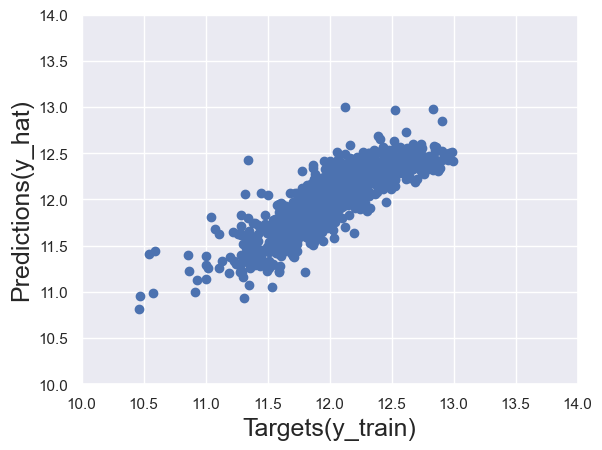

In [30]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions(y_hat)', size=18)
plt.xlim(10,14)
plt.ylim(10,14)
plt.show()

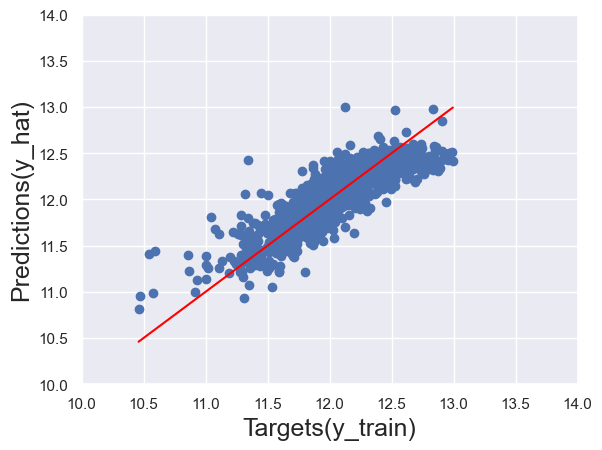

In [31]:
plt.scatter(y_train, y_hat)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')  # diagonal
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions(y_hat)', size=18)
plt.xlim(10, 14)
plt.ylim(10, 14)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

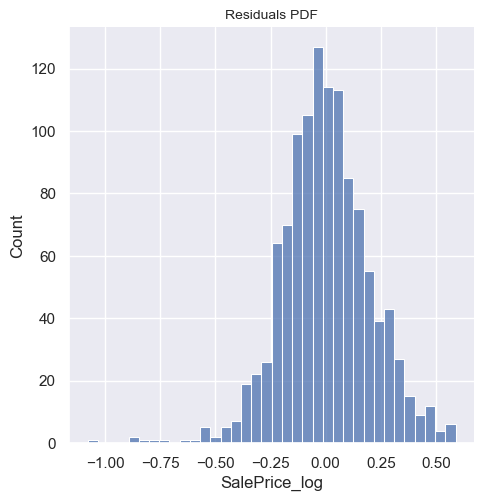

In [32]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size=10)

In [33]:
reg.score(x_train, y_train)

0.7249139686417074

In [34]:
reg.intercept_

12.014409718857063

In [35]:
reg.coef_

array([ 4.23784173e-02,  2.16176832e-01,  6.53104365e-02,  1.42099254e-01,
        6.63244221e-02, -2.06999649e-03, -1.13778497e-02, -6.28169444e-03,
       -8.74101252e-02, -4.51654430e-02, -7.47609343e-03, -1.39356123e-02,
       -2.72311504e-02, -4.52724982e-02, -2.06582248e-03,  8.73820878e-03,
       -3.31359456e-02, -2.44884349e-02, -2.31250730e-02,  1.12301255e-01,
        5.66723660e-02,  2.09937440e-01,  1.70004145e-01,  7.03610881e-05,
       -1.04456475e-02,  1.53412259e-03, -8.79581423e-04, -1.30588130e-02,
       -2.31250730e-02, -3.44932659e-02, -6.68027713e-02,  3.81826574e-03,
       -9.25656839e-03,  5.63792744e-02,  2.90078511e-03,  3.78232591e-02,
        1.78744512e-04,  7.89900517e-03,  3.33495348e-02,  2.16959764e-02,
        1.80174559e-02,  2.96063331e-02,  2.86507022e-02,  2.18213663e-02,
        1.06298628e-02, -2.06999649e-03, -1.13778497e-02, -6.28169444e-03,
       -8.74101252e-02, -4.51654430e-02, -7.47609343e-03, -1.39356123e-02,
       -2.72311504e-02, -

In [36]:
reg_summary = pd. DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,OverallCond,0.042378
1,YearBuilt,0.216177
2,YearRemodAdd,0.065310
3,LotArea_log,0.142099
4,TotalBsmtSF_log,0.066324
5,MSSubClass_160,-0.002070
6,MSSubClass_180,-0.011378
7,MSSubClass_190,-0.006282
8,MSSubClass_20,-0.087410
9,MSSubClass_30,-0.045165


In [37]:
# Testing our model

In [38]:
y_hat_test = reg.predict(x_test)

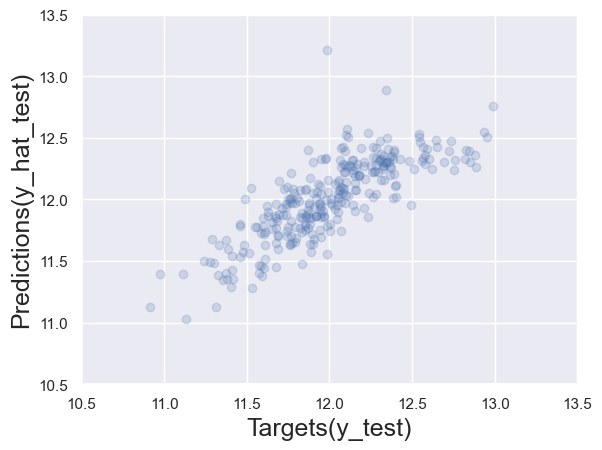

In [39]:
# alpha shows the opacity of our map
plt.scatter(y_test, y_hat_test
            , alpha=0.2)
plt.xlabel('Targets(y_test)', size=18)
plt.ylabel('Predictions(y_hat_test)', size=18)
plt.xlim(10.5,13.5)
plt.ylim(10.5,13.5)
plt.show()

In [40]:
df_pf = pd.DataFrame(y_hat_test, columns=['prediction'])
df_pf.head()
# but this is our prediction in logarithim form so we have to convert it

,prediction
0,11.477731
1,12.331267
2,11.822398
3,12.271225
4,11.862955


In [41]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['prediction'])
df_pf.head()

,prediction
0,96541.777955
1,226673.717319
2,136270.639606
3,213464.375453
4,141910.954155


In [42]:
y_test
y_test = y_test.reset_index(drop=True)
y_test.head()

0    11.831386
1    11.951187
2    11.682677
3    12.128117
4    11.917730
Name: SalePrice_log, dtype: float64

In [43]:
df_pf['Target'] = np.exp(y_test)
df_pf

,prediction,Target
0,96541.777955,137501.0
1,226673.717319,155001.0
2,136270.639606,118501.0
3,213464.375453,185001.0
4,141910.954155,149901.0
...,...,...
284,226804.167717,222501.0
285,151506.056037,200101.0
286,85453.149926,87501.0
287,152570.308507,148001.0


In [44]:
df_pf['Residual'] = df_pf['Target'] - df_pf['prediction']

In [45]:
df_pf['Difference%'] = (df_pf['Residual']/df_pf['Target']*100)

In [46]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf

,prediction,Target,Residual,Difference%
0,96541.78,137501.00,40959.22,29.79
1,226673.72,155001.00,-71672.72,46.24
2,136270.64,118501.00,-17769.64,15.00
3,213464.38,185001.00,-28463.38,15.39
4,141910.95,149901.00,7990.05,5.33
...,...,...,...,...
284,226804.17,222501.00,-4303.17,1.93
285,151506.06,200101.00,48594.94,24.29
286,85453.15,87501.00,2047.85,2.34
287,152570.31,148001.00,-4569.31,3.09
